In [85]:
import pandas as pd
import numpy as np
import seaborn as sns

In [86]:
data = pd.read_csv("/content/ice_cream.csv")
data

,X,Y
0,2,4
1,3,5
2,5,7
3,7,10
4,9,15


In [87]:
data.rename(columns={"Temperature": 'X' , "Revenue" :"Y"},inplace=True)
data.head()

,X,Y
0,2,4
1,3,5
2,5,7
3,7,10
4,9,15


In [88]:
data[['X2']] = data[['X']]**2

In [89]:
data['XY'] = data['X']*data['Y']

In [90]:
data

,X,Y,X2,XY
0,2,4,4,8
1,3,5,9,15
2,5,7,25,35
3,7,10,49,70
4,9,15,81,135


In [91]:
data.describe()

,X,Y,X2,XY
count,5.000000,5.000000,5.00000,5.000000
mean,5.200000,8.200000,33.60000,52.600000
std,2.863564,4.438468,31.77735,51.974032
min,2.000000,4.000000,4.00000,8.000000
25%,3.000000,5.000000,9.00000,15.000000
50%,5.000000,7.000000,25.00000,35.000000
75%,7.000000,10.000000,49.00000,70.000000
max,9.000000,15.000000,81.00000,135.000000


In [92]:
N = data.shape[0]

Formula ---> M =  N Σ(XY) − ΣX ΣY / N Σ(X2) − (ΣX)2

In [93]:
NUMERATOR = (N * data['XY'].sum()) - (data['X'].sum() * data['Y'].sum())

In [94]:
DENOMINATOR = (N * data['X2'].sum()) - (data['X'].sum() ** 2)

In [95]:
M = NUMERATOR / DENOMINATOR
print(M)

1.5182926829268293


Formula ---> B =  ΣY − M (ΣX) / N

In [96]:
B = ( data['Y'].sum() - M * data['X'].sum() ) / N
print(B)

0.30487804878048763


Formula ---> Y = MX + B

In [97]:
result = map(lambda X:M*X + B,data['X'])
data["Formula"] = list(result)


In [98]:
data

,X,Y,X2,XY,Formula
0,2,4,4,8,3.341463
1,3,5,9,15,4.859756
2,5,7,25,35,7.896341
3,7,10,49,70,10.932927
4,9,15,81,135,13.969512


In [99]:
data['Error'] = data['Formula'] - data['Y']

In [100]:
data

,X,Y,X2,XY,Formula,Error
0,2,4,4,8,3.341463,-0.658537
1,3,5,9,15,4.859756,-0.140244
2,5,7,25,35,7.896341,0.896341
3,7,10,49,70,10.932927,0.932927
4,9,15,81,135,13.969512,-1.030488


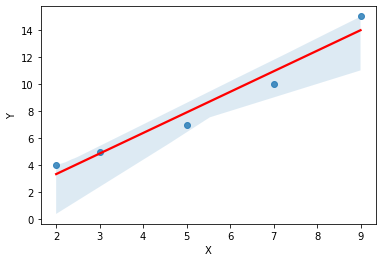

In [101]:
g = sns.regplot(x="X", y="Y", data=data,label=True);
regline = g.get_lines()[0]
regline.set_color('red')